In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
sc.logging.print_versions()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import palantir
import tkinter

scanpy==1.4.6 anndata==0.7.3 umap==0.4.1 numpy==1.19.1 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.8.0 louvain==0.7.0


In [3]:
sct_normalized_matrix = './ChiR_myeloid_SCT_normalized.txt'
counts = pd.read_csv(sct_normalized_matrix, sep=',', index_col=0).transpose()
counts = counts.sort_index()
counts

,SAMD11,HES4,ISG15,TNFRSF18,TNFRSF4,MXRA8,MMP23B,TNFRSF14,RP11-46F15.2,SMIM1,...,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-ND6,MT-CYB
AAACCTGAGACTAGGC-1,-0.108147,-0.528742,1.965602,-0.099195,-0.283771,-0.189939,-0.143919,-0.373150,-0.056332,-1.074464,...,-0.009565,-0.073590,-0.126286,-0.194850,0.117200,0.326328,-0.348170,0.683544,0.469428,1.184347
AAACCTGAGGACGAAA-1,-0.266822,-0.770838,-0.962602,-0.017508,-0.146977,-0.576830,-0.320599,-0.561576,-0.068365,-0.854438,...,-1.023875,0.453421,-0.103652,0.513048,0.730029,0.115109,0.659624,1.547681,-0.774342,0.084690
AAACCTGAGGTCGGAT-1,-0.225528,-0.807195,-1.083685,-0.048344,-0.154940,-0.507077,-0.273521,1.147606,-0.066318,-0.949284,...,-0.297748,0.097318,0.472927,-0.064916,-0.191173,0.058994,0.631161,-0.160386,1.021728,-0.021821
AAACCTGCACAGAGGT-1,-0.096393,-0.493619,-0.123148,0.035614,0.001505,-0.141473,-0.078434,-0.570918,0.005203,-0.401612,...,-1.313380,0.082623,-0.773002,0.138122,-0.070157,0.927063,-0.069659,-0.514813,-0.896636,-0.296035
AAACCTGCACCAGCAC-1,-0.196441,-0.752752,-0.179625,-0.044924,-0.148959,-0.425838,-0.233890,-0.507742,-0.056140,-0.911119,...,1.466366,-0.255639,0.623179,-0.560095,-0.237422,0.005297,1.047115,-0.063127,-0.925332,-0.280318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACCGGCT-1,-0.283678,-0.498191,-1.374117,-0.020480,-0.284157,-0.554037,-0.361437,-0.491866,-0.085493,-0.863224,...,0.442747,-0.895035,-1.099484,0.062308,-0.812220,1.677453,-0.143963,-0.212072,-0.316657,-0.911662
TTTGTCAGTAGAGTGC-1,-0.357131,-0.914832,-0.707815,-0.028487,-0.180867,-0.817582,-0.444368,-0.552938,-0.100726,-0.983754,...,-0.197226,0.286564,0.131432,-0.177335,-0.070695,0.076112,-0.478268,0.068123,0.145226,0.569972
TTTGTCAGTCGTTGTA-1,0.031394,-0.394403,1.013928,-0.035301,-0.053511,0.106575,0.061168,-0.342123,0.014224,-0.540850,...,0.481895,-1.872479,1.465577,-1.671240,-1.041534,0.444304,0.126121,-0.619051,1.835767,-0.068323
TTTGTCATCACAACGT-1,-0.175819,6.390023,-0.780007,-0.041566,-0.130621,-0.397113,-0.211429,-0.437713,-0.050504,-0.824336,...,-0.042223,0.425242,0.911156,0.141039,-0.135394,-0.702739,0.671886,0.420731,-1.085650,-0.910599


In [4]:
meta_data = pd.read_csv('./ChiR_myeloid_meta.csv', index_col=0)
meta_data = meta_data.sort_index()
meta_data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,SCT_snn_res.0.3,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,seurat_clusters,annotated_names
AAACCTGAGACTAGGC-1,ChiR,33862,5400,2.793692,26679,5350,0.189158,-0.526164,S,ChiR,2,2,3,3,10,10,10,Progenitor
AAACCTGAGGACGAAA-1,ChiR,45230,5824,3.283219,26408,5317,-0.255761,0.533412,G2M,ChiR,0,4,2,2,5,5,5,5
AAACCTGAGGTCGGAT-1,ChiR,58432,6285,2.842620,25890,4894,-0.096797,0.506375,G2M,ChiR,0,0,2,2,0,0,0,0
AAACCTGCACAGAGGT-1,ChiR,15135,3362,6.045590,25435,3605,-0.268716,0.511843,G2M,ChiR,0,0,0,0,3,3,3,3
AAACCTGCACCAGCAC-1,ChiR,51258,6142,3.273635,26284,5266,-0.083129,0.413717,G2M,ChiR,0,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACCGGCT-1,ChiR,15489,3003,2.944025,25486,3267,-0.279015,-0.347397,G1,ChiR,3,3,4,4,4,2,2,2
TTTGTCAGTAGAGTGC-1,ChiR,64180,6569,2.020879,25816,4932,-0.301830,0.723362,G2M,ChiR,0,0,2,2,0,0,0,0
TTTGTCAGTCGTTGTA-1,ChiR,14685,3622,4.916582,25352,3846,0.137761,0.031600,S,ChiR,0,0,0,0,3,3,3,3
TTTGTCATCACAACGT-1,ChiR,39559,5412,3.089057,26493,5128,-0.057884,0.402009,G2M,ChiR,0,4,2,2,5,5,5,5


In [5]:
pca_projections, _ = palantir.utils.run_pca(counts)

In [6]:
dm_res = palantir.utils.run_diffusion_maps(pca_projections)

Determing nearest neighbor graph...


/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/opt/anaconda3/lib/python3.7/site-packages/palantir/utils.py:40: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  kNN = temp.uns['neighbors']['distances']


In [7]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)

In [8]:
tsne = palantir.utils.run_tsne(ms_data)

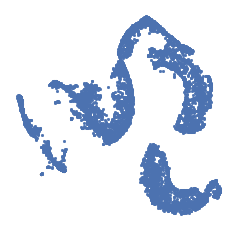

In [9]:
fig, ax = palantir.plot.plot_tsne(tsne)
plt.savefig('tsne.png')

In [13]:
import harmony
fdl = harmony.plot.force_directed_layout(dm_res['kernel'], counts.index)

100%|██████████| 500/500 [00:41<00:00, 11.94it/s]

BarnesHut Approximation  took  16.98  seconds
Repulsion forces  took  22.07  seconds
Gravitational forces  took  0.14  seconds
Attraction forces  took  1.18  seconds
AdjustSpeedAndApplyForces step  took  0.66  seconds


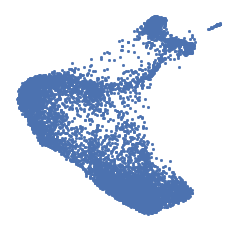

In [14]:
fig, ax = palantir.plot.plot_tsne(fdl)

In [15]:
imp_df = palantir.utils.run_magic_imputation(counts, dm_res)

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


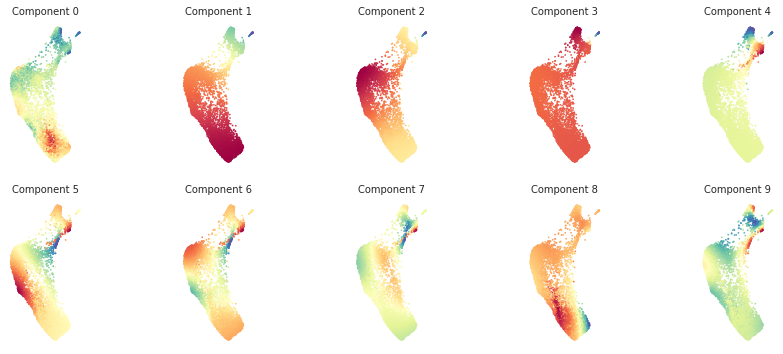

In [16]:
palantir.plot.plot_diffusion_components(fdl, dm_res)
#plt.savefig('tsne_diff_components.png')

In [34]:
meta_data[meta_data.annotated_names=="0"]

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,SCT_snn_res.0.3,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,seurat_clusters,annotated_names
AAACCTGAGGTCGGAT-1,ChiR,58432,6285,2.842620,25890,4894,-0.096797,0.506375,G2M,ChiR,0,0,2,2,0,0,0,0
AAACCTGCACCAGCAC-1,ChiR,51258,6142,3.273635,26284,5266,-0.083129,0.413717,G2M,ChiR,0,0,2,2,0,0,0,0
AAACCTGTCTTCCTTC-1,ChiR,26054,4847,3.343057,26051,4847,0.205268,-0.090405,S,ChiR,0,0,0,0,0,0,0,0
AAACGGGCAGGATTGG-1,ChiR,27896,4748,3.821336,26518,4748,-0.053369,-0.322677,G1,ChiR,0,0,0,0,0,0,0,0
AAACGGGCAGTTCCCT-1,ChiR,18357,3895,4.608596,25302,3925,-0.004906,0.209946,G2M,ChiR,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTTAGTGGG-1,ChiR,32280,5004,4.092317,26663,4980,-0.251433,0.218463,G2M,ChiR,0,0,0,0,0,0,0,0
TTTGGTTAGCTATGCT-1,ChiR,34358,5447,2.948367,26673,5417,-0.230756,0.442380,G2M,ChiR,0,0,2,2,0,0,0,0
TTTGGTTAGGTGCTAG-1,ChiR,22017,4335,5.368579,25336,4335,-0.011343,-0.413147,G1,ChiR,0,0,2,2,0,0,0,0
TTTGGTTTCCACTCCA-1,ChiR,48204,5936,2.775703,26289,5146,0.190997,0.156717,S,ChiR,0,0,2,2,0,0,0,0


In [41]:
terminal_states = pd.Series(['Mast', 'Megak', 'RBCs', '5', '0'], 
                           index=['AAAGTAGCATCTGGTA-1', 'TTTGTCACAGGGAGAG-1', 'AAGGTTCGTCCGAAGA-1',
                                 'AAACCTGAGGACGAAA-1', 'AAACCTGTCTTCCTTC-1'])

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb5d07ac490>)

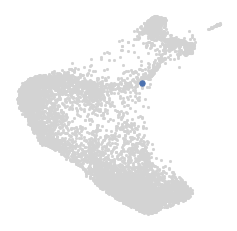

In [42]:
start_cell = "AAACCTGTCTGTCCGT-1"
palantir.plot.highlight_cells_on_tsne(fdl, [start_cell])
#plt.savefig('start_cell.png')

In [50]:
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500, terminal_states=terminal_states.index)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0035426139831542967 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.09690171877543131 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9986
Correlation at iteration 2: 0.9999
Correlation at iteration 3: 1.0000
Entropy and branch probabilities...
Markov chain construction...


/opt/anaconda3/lib/python3.7/site-packages/palantir/core.py:287: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  traj_nbrs = pd.DataFrame(pseudotime[np.ravel(waypoints[ind])].values.reshape(


Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [51]:
lst = []
for i in list(pr_res.branch_probs.columns):
    print(meta_data.annotated_names[i])
    lst.append(meta_data.annotated_names[i])

pr_res.branch_probs.columns = lst
pr_res.branch_probs = pr_res.branch_probs.loc[:, lst]

5
0
Mast
RBCs
Megak


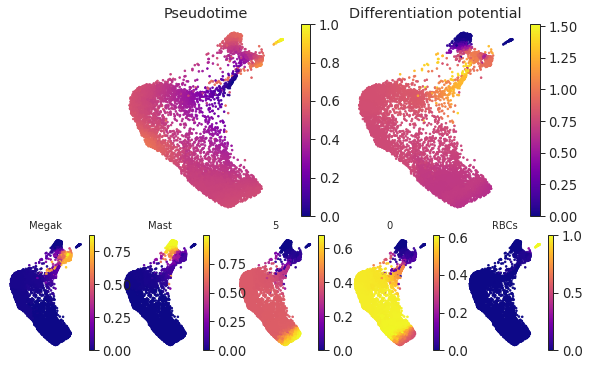

In [52]:
palantir.plot.plot_palantir_results(pr_res, fdl)
#plt.savefig('palantir_summary.png')

In [53]:
df = pd.DataFrame()
df = pr_res.branch_probs
df['pseudotime'] = np.array(pr_res.pseudotime)
df['entropy'] = np.array(pr_res.entropy)
df['ClusterName'] = list(meta_data.annotated_names)
df['ClusterName'] = df['ClusterName'].astype("category")

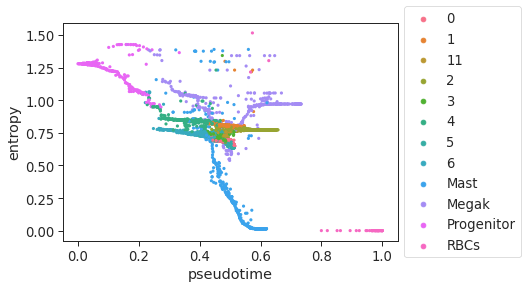

In [54]:
ax = sns.scatterplot(x="pseudotime", y="entropy", hue="ClusterName", data=df, s=10,linewidth=0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('pseudotime_entropy_seuratClusters.png', bbox_inches='tight')
plt.show()

In [55]:
pca_projections.to_csv('./ChiR_myeloid_pca_projections.csv', index=True)
ms_data.to_csv('./ChiR_myeloid_ms_data.csv', index=True)
tsne.to_csv('./ChiR_myeloid_tsne.csv', index=True)
df.to_csv('./ChiR_myeloid_palantir_meta_data.csv', index=True)